# Logistic Regression with Titanic Dataset

This notebook demonstrates how to use logistic regression to predict survival on the Titanic. We will identify the top 3 most important features that influence survival and discuss their impact using various evaluation metrics and visualizations.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

## Load and Explore the Titanic Dataset

We will load the Titanic dataset and perform basic exploratory data analysis to understand the features.

In [2]:
# Load Titanic dataset
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing Values:
survived         0
pclass           0
sex       

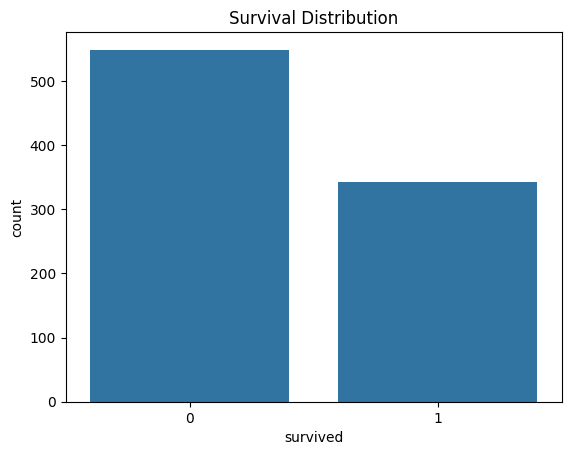

In [3]:
# Basic EDA
print('Dataset Info:')
df.info()
print('\nMissing Values:')
print(df.isnull().sum())
print('\nSurvival Distribution:')
print(df['survived'].value_counts())
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')
plt.show()

## Preprocess the Data

We will handle missing values, encode categorical variables, and select relevant features for modeling.

In [4]:
# Preprocess the data
# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df_model = df[features + ['survived']].copy()

# Handle missing values
# Fill age with median, embarked with mode
df_model['age'].fillna(df_model['age'].median(), inplace=True)
df_model['embarked'].fillna(df_model['embarked'].mode()[0], inplace=True)

# Encode categorical variables
# sex and embarked
df_model = pd.get_dummies(df_model, columns=['sex', 'embarked'], drop_first=True)

# Show processed data
df_model.head()

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_80074/1924171943.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['age'].fillna(df_model['age'].median(), inplace=True)
/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_80074/1924171943.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


## Split Data into Training and Test Sets

We will split the preprocessed data into training and test sets for model evaluation.

In [5]:
# Split data into features and target
X = df_model.drop('survived', axis=1)
y = df_model['survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (712, 8)
Test shape: (179, 8)


## Train Logistic Regression Model

We will fit a logistic regression model to the training data.

In [6]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

## Identify Top 3 Important Features

We will extract the feature coefficients from the trained model, rank them by absolute value, and select the top 3 features most associated with survival.

In [7]:
# Identify top 3 important features
feature_names = X_train.columns
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients, 'abs_coefficient': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)
top3 = feature_importance.head(3)
print('Top 3 important features:')
print(top3[['feature', 'coefficient']])

Top 3 important features:
      feature  coefficient
5    sex_male    -2.559245
0      pclass    -1.092540
7  embarked_S    -0.381055


## Visualize Feature Importance and Impact

We will create bar plots to visualize the coefficients of the top 3 features and discuss their impact on survival probability.

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_80074/157402304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top3, palette='viridis')


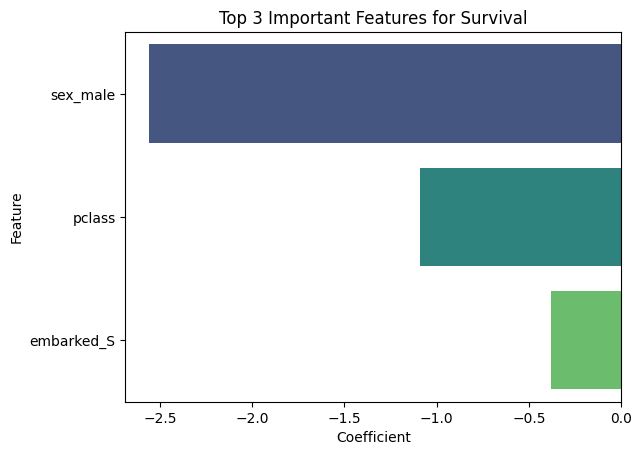

Feature 'sex_male' has a coefficient of -2.559. 
  - Higher values of this feature decrease the probability of survival.
Feature 'pclass' has a coefficient of -1.093. 
  - Higher values of this feature decrease the probability of survival.
Feature 'embarked_S' has a coefficient of -0.381. 
  - Higher values of this feature decrease the probability of survival.


In [8]:
# Visualize top 3 feature importances
sns.barplot(x='coefficient', y='feature', data=top3, palette='viridis')
plt.title('Top 3 Important Features for Survival')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

for _, row in top3.iterrows():
    print(f"Feature '{row['feature']}' has a coefficient of {row['coefficient']:.3f}. ")
    if row['coefficient'] > 0:
        print(f"  - Higher values of this feature increase the probability of survival.")
    else:
        print(f"  - Higher values of this feature decrease the probability of survival.")

## Evaluate Model Performance

We will evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix on the test set.

- Accuracy measures the proportion of total correct predictions.
- Precision indicates how many of the predicted positive cases were actually positive.
- Recall (or sensitivity) shows how many of the actual positive cases were correctly identified.
- F1-score is the harmonic mean of precision and recall, providing a balance between the two.
- Confusion matrix, which summarizes the counts of true positives, true negatives, false positives, and false negatives.

Accuracy: 0.804
Precision: 0.793
Recall: 0.667
F1-score: 0.724

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



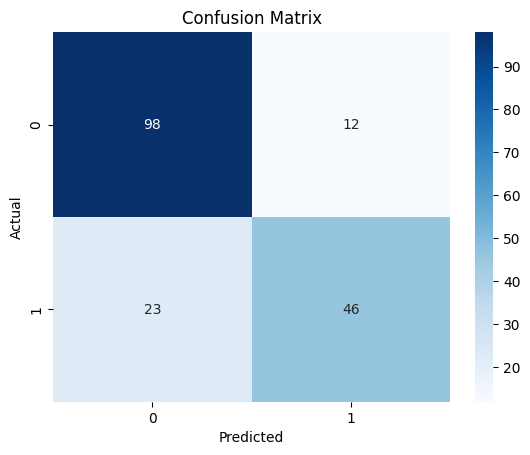

In [9]:
# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1-score: {f1:.3f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()